visualize the C-19 stream members based on $P_{\in \text{stream}}$

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
from gala.coordinates import GreatCircleICRSFrame
import astropy.coordinates as coord
import astropy.units as u
import numpy as np

In [63]:
df = pd.read_csv('paper_stars.csv')
p_threshold = 0.5 # *100 = %
threshold_mask = df['stream_prob'] >= p_threshold

Text(0.5, 1.0, 'C-19 ($P_\\mathrm{\\in stream}$ > 50%)')

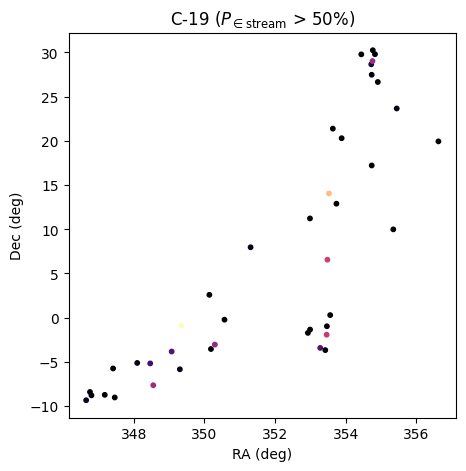

In [73]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(df['TARGET_RA'][threshold_mask], df['TARGET_DEC'][threshold_mask], c=df['stream_prob'][threshold_mask], s=10, label='All Stars', cmap='magma_r')

ax.set_xlabel('RA (deg)')
ax.set_ylabel('Dec (deg)')
ax.set_title(fr'C-19 ($P_\mathrm{{\in stream}}$ > {p_threshold*100:.0f}%)')


Rotate into stream frame given by [R. Ibata+2023](https://ui.adsabs.harvard.edu/abs/2024ApJ...967...89I/abstract).

In [65]:
pole_c19 = coord.SkyCoord(ra=81.45*u.deg, dec=-6.346*u.deg)
frame = GreatCircleICRSFrame.from_pole_ra0(pole=pole_c19, ra0=354.356*u.deg)

def ra_dec_to_phi1_phi2(frame, ra, dec):
    '''
    Given a frame, convert ra and dec to phi1 and phi2
    '''
    skycoord_data = coord.SkyCoord(ra=ra, dec=dec, frame='icrs')
    transformed_skycoord = skycoord_data.transform_to(frame)
    phi1, phi2 = transformed_skycoord.phi1.deg, transformed_skycoord.phi2.deg
    return phi1, phi2  

phi1, phi2 = ra_dec_to_phi1_phi2(frame, np.array(df['TARGET_RA'])*u.deg, np.array(df['TARGET_DEC'])*u.deg)

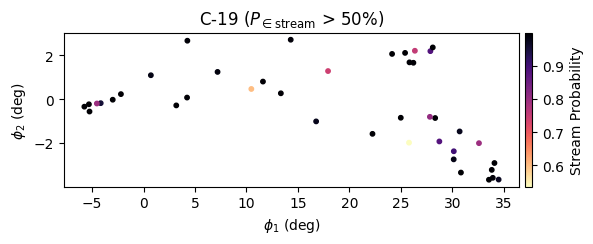

In [75]:
fig, ax = plt.subplots(figsize=(7, 2))
cax = ax.scatter(phi1[threshold_mask], phi2[threshold_mask], c=df['stream_prob'][threshold_mask], s=10, label='All Stars', cmap='magma_r')
ax.set_xlabel(r'$\phi_1$ (deg)')
ax.set_ylabel(r'$\phi_2$ (deg)')
ax.set_title(fr'C-19 ($P_\mathrm{{\in stream}}$ > {p_threshold*100:.0f}%)')

fig.colorbar(cax, ax=ax, label='Stream Probability', pad=0.01)

